In [6]:
import pandas as pd
import numpy as np
import os
from Combinedscripts import projectfunctions # This is called a relative import
df = projectfunctions.load_and_process('Data/raw/Medical_Cost.csv')

In [7]:
df.head()

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
1248,18,female,0,40.0,no,$1633.96,southeast
482,18,female,0,31.0,no,$1622.19,southeast
492,18,female,0,25.0,no,$2196.47,northeast
525,18,female,0,34.0,no,$11482.63,southeast
529,18,male,0,25.0,no,$1708.00,northeast


In [21]:
df.describe(include = [object]).T

,count,unique,top,freq
Gender,1338,2,male,676
Tobacco User,1338,2,no,1064
Medical Costs per region,1338,1337,$1639.56,2
Region,1338,4,southeast,364


In [22]:
df.describe(exclude = [object]).T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.0,64.0
Children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
BMI,1338.0,30.663677,6.096007,16.0,26.0,30.0,35.0,53.0


<ipython-input-9-34dbc027351c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')


<AxesSubplot:xlabel='BMI', ylabel='Medical Costs per region'>

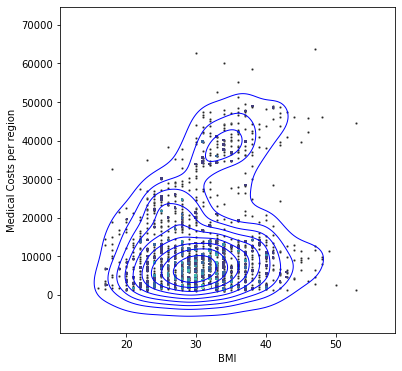

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.copy()
df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')
df1['Medical Costs per region'] = df1['Medical Costs per region'].astype(float)
f,ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x = 'BMI', y = "Medical Costs per region", data = df1,s = 5,color = '.15')
sns.histplot(x = 'BMI', y = "Medical Costs per region", data = df1,bins = 150,pthresh = .1,cmap = 'mako')
sns.kdeplot(x = 'BMI', y = "Medical Costs per region", data = df1,levels = 10,color = 'b',linewidths= 1)

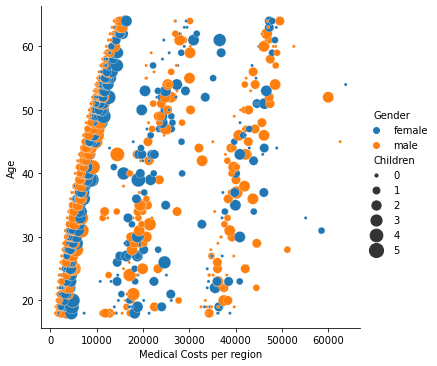

In [10]:
sns.relplot(x = 'Medical Costs per region', y = 'Age',hue = 'Gender',data = df1,size = 'Children',sizes = (10,200))

<AxesSubplot:xlabel='Region', ylabel='Medical Costs per region'>

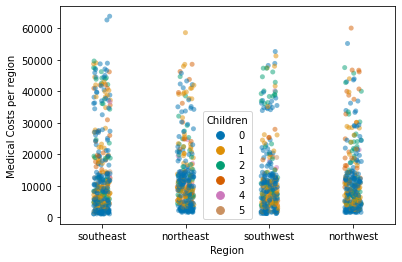

In [11]:
sns.stripplot(data = df1,y ='Medical Costs per region', x = 'Region',hue = 'Children', palette = 'colorblind' , alpha = 0.5 )

<AxesSubplot:xlabel='Gender', ylabel='Age'>

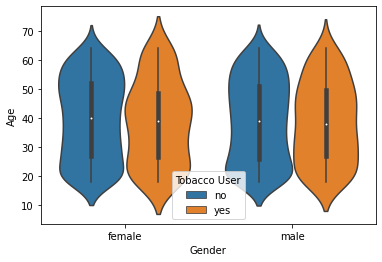

In [12]:
sns.violinplot(data=df,
             y='Age',
             x='Gender',
             hue='Tobacco User')

<AxesSubplot:title={'center':'Age'}, xlabel='Children'>

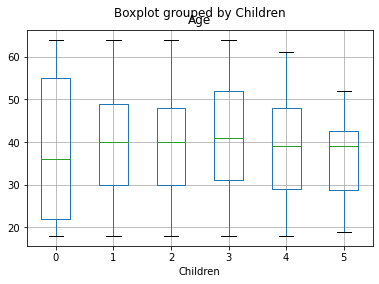

In [19]:
df.boxplot(column='Age',by = 'Children')

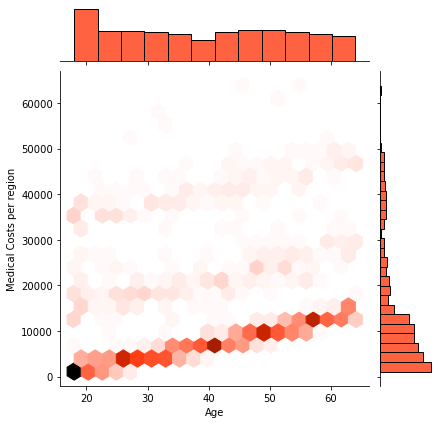

In [20]:
sns.jointplot(x = 'Age', y = "Medical Costs per region",kind = 'hex',color = '#FF2D00', data = df1)

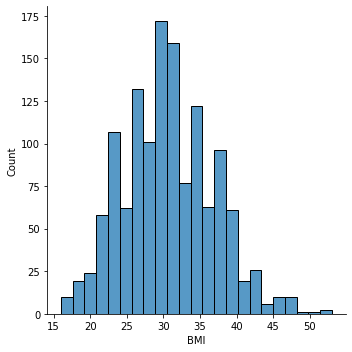

In [16]:
sns.displot(df['BMI'])